## Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

## Data

In [2]:
df = pd.read_csv('../data/Corona_NLP_filtered.csv')
df = df.dropna()
df.head()

,Unnamed: 0,OriginalTweet,Sentiment,Tweet_filtered,Word_list,Senten_list
0,1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,"['advice', 'talk', 'neighbour', 'family', 'exc...",['advice talk to your neighbours family to exc...
1,2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,"['coronavirus', 'australia', 'woolworth', 'giv...",['coronavirus australia: woolworths to give el...
2,3,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,"['food', 'stock', 'one', 'empty', 'please', 'd...",['my food stock is not the only one which is e...
3,4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak im paranoi...,"['ready', 'go', 'supermarket', 'covid', 'outbr...","['me, ready to go at supermarket during the #c..."
4,5,As news of the regionÂs first confirmed COVID...,Positive,news regionâ  first confirmed covid case came...,"['news', 'regionâ', '\x92', 'first', 'confirme...",['as news of the regionâ\x92s first confirmed ...


In [110]:
df.shape

(44249, 6)

In [113]:
df.Sentiment.value_counts()

Positive              12240
Negative              10852
Neutral                7902
Extremely Positive     7204
Extremely Negative     6051
Name: Sentiment, dtype: int64

In [3]:
df.Word_list = df.Word_list.apply(eval)

## Sentiment Analysis

### EDA

#### NCR Lexicon(6 emotions)

trust, anticipation, joy, surprise, anger, disgust, fear, sadness 

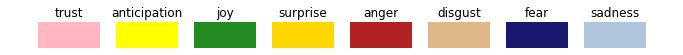

In [51]:
emotions_color = {"trust" : "lightpink", "anticipation" : "yellow", "joy" : "forestgreen", "surprise" : "gold", 
                 "anger" : "firebrick", "disgust" : "burlywood", "fear" : "midnightblue", "sadness" : "lightsteelblue"}

plt.figure(figsize=(12,0.5))
my_bars = plt.bar(list(emotions_color),8*[1],color=emotions_color.values())
for i,bar in enumerate(my_bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.2, list(emotions_color)[i],
                 ha='center', fontsize=12)
plt.axis("off")
plt.show();

In [111]:
## Concat every 10 rows

i = 0
sentences = []
while i < df.shape[0]:
    sentences.append(' '.join(df.Tweet_filtered.iloc[i:i+10]))
    i = i+10
    
# Emotions
sequence_of_emotions_level = []
sequence_of_emotions_color = []
emotion_list = []

for sentence in sentences:
    emotions = NRCLex(sentence)
    emotion_frequencies = emotions.affect_frequencies
    
    emotion_frequencies.pop("positive",None)
    emotion_frequencies.pop("negative",None)
    top_emotion = max(emotion_frequencies,key=emotion_frequencies.get)
    
    emotion_list.append(top_emotion)
    sequence_of_emotions_level.append(emotion_frequencies[top_emotion])
    sequence_of_emotions_color.append(emotions_color[top_emotion])

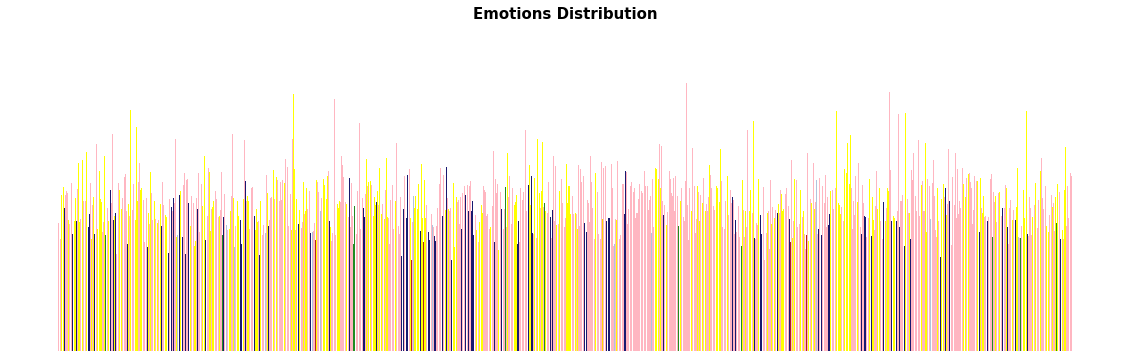

In [112]:
# plot
font = {'fontsize':15, 'fontweight':'bold'}

plt.figure(figsize=(20, 6))
plt.bar(range(len(sentences)), sequence_of_emotions_level, color=sequence_of_emotions_color)
frame1 = plt.gca()
frame1.axis('off')
plt.title('Emotions Distribution', fontdict=font)
plt.show();

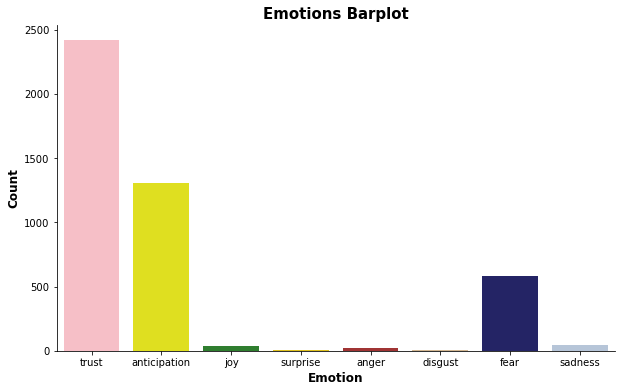

In [128]:
font2 = {'fontsize':12, 'fontweight':'bold'}

plt.figure(figsize=(10,6))
sns.countplot(x = emotion_list, palette=list(emotions_color.values()), 
              order = list(emotions_color.keys()));
plt.title('Emotions Barplot', fontdict=font);
plt.xlabel('Emotion', fontdict=font2);
plt.ylabel('Count', fontdict=font2);
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

#### Bing Liu Lexicon

In [55]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import TweetTokenizer

positive = set(opinion_lexicon.positive())
negative = set(opinion_lexicon.negative())

df['Positive'] = df.Word_list.apply(lambda x: list(positive.intersection(set(x))))
df['Negative'] = df.Word_list.apply(lambda x: list(negative.intersection(set(x))))
df['Sentiment_Score'] = df.apply(lambda x: len(x.Positive) - len(x.Negative), axis=1)

sentiment_score = list(df.Sentiment_Score[df.Sentiment_Score != 0])

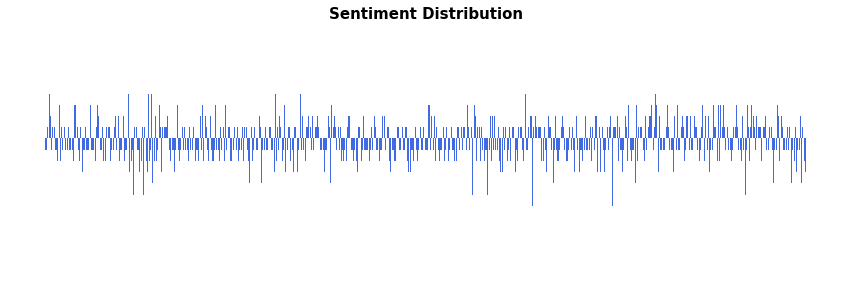

In [56]:
font = {'fontsize':15, 'fontweight':'bold'}

plt.figure(figsize=(15, 5))
plt.bar(range(len(sentiment_score)), sentiment_score, color = 'royalblue')
frame1 = plt.gca()
frame1.axis('off')
plt.title('Sentiment Distribution', fontdict=font)
plt.show();

In [59]:
#concat every 10 sentences
word_list = []
i = 0
while i < df.shape[0]:
    word_list.append(sum(df.Word_list[i:i+10].to_list(),[]))
    i = i+10

sentiment_score_10 = []
for l in word_list:
    score = 0
    for word in l:
        if word in positive:
            score += 1
        elif word in negative:
            score -= 1
        else:
            continue
    sentiment_score_10.append(score)

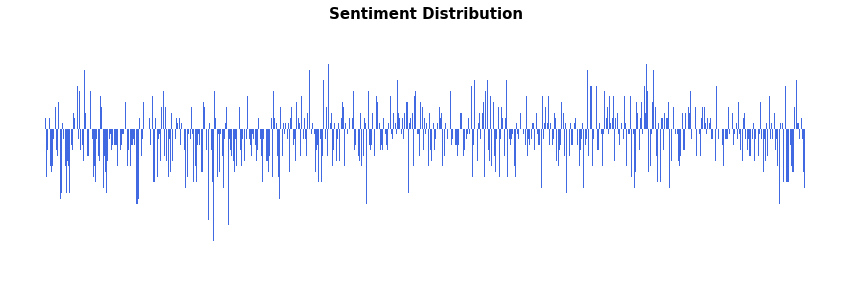

In [61]:
font = {'fontsize':15, 'fontweight':'bold'}

plt.figure(figsize=(15, 5))
plt.bar(range(len(sentiment_score_10)), sentiment_score_10, color = 'royalblue')
frame1 = plt.gca()
frame1.axis('off')
plt.title('Sentiment Distribution', fontdict=font)
plt.show();

In [42]:
most_pos = df.Sentiment_Score.argmax()
most_neg = df.Sentiment_Score.argmin()
print('Most positive sentence:')
print(df.OriginalTweet.iloc[most_pos])
print('-'*50)
print('Most negative sentence:')
print(df.OriginalTweet.iloc[most_neg])

Most positive sentence:
@Tesco really impressed with tesco at haddington Scotland. Hand sanitizer available at entrance with opportunity to clean trolley handles. Staff polite friendly and giving sound guidance to shoppers to shop safely. Well done and thank you ?#staysafe #coro
--------------------------------------------------
Most negative sentence:





  World people  -- panic, panicking, panicked, panicked..


### Classification

In [4]:
df.Sentiment.value_counts()

Positive              12240
Negative              10852
Neutral                7902
Extremely Positive     7204
Extremely Negative     6051
Name: Sentiment, dtype: int64

In [8]:
sentiment_encode= {'Positive':1, 'Negative':2, 'Neutral':3,
                   'Extremely Positive':4, 'Extremely Negative':5}
y = df.Sentiment.replace(sentiment_encode)
print(y.value_counts(normalize=True))

1    0.276616
2    0.245248
3    0.178580
4    0.162806
5    0.136749
Name: Sentiment, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

tweet_train, tweet_test, y_train, y_test = train_test_split(df.Tweet_filtered, y, test_size=.2, 
                                                                stratify=y, random_state=123)

In [9]:
pipe_gbc = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, max_df=.3)),
    ('gbc', GradientBoostingClassifier(n_estimators=200))
])

param_grid = {'tfidf__ngram_range':[[1,1], [1,2]],
              'gbc__max_depth':[2, 10]}

gs_pipe_gbc = GridSearchCV(pipe_gbc, param_grid, cv=3, n_jobs=-1).fit(tweet_train, y_train)
print(gs_pipe_gbc.best_params_)
print(gs_pipe_gbc.best_score_.round(2))

{'gbc__max_depth': 10, 'tfidf__ngram_range': [1, 1]}
0.52


In [20]:
from lightgbm import LGBMClassifier

pipe_lgbc = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, max_df=.3)),
    ('lgbc', LGBMClassifier(n_estimators=400))
])

param_grid_lgbc = {'tfidf__ngram_range':[[1,1], [1,2]],
              'lgbc__max_depth':[2, 10, 20]}

gs_pipe_lgbc = GridSearchCV(pipe_lgbc, param_grid_lgbc, cv=3, n_jobs=-1).fit(tweet_train, y_train)
print(gs_pipe_gbc.best_params_)
print(gs_pipe_gbc.best_score_.round(2))

{'gbc__max_depth': 10, 'tfidf__ngram_range': [1, 1]}
0.52
